Apply FINCHES on co-expressed ADs and CoAs.

Get ADs for co-expressed TFs on MED12/12L.

In [1]:
import pandas as pd
import numpy as np

---
# Getting list of MED12/12L TFs to run on FINCHES

In [3]:
#Get list of ADs, with uniprot ID, Gene name, ensemble, AD sequence
ADs = pd.read_csv("~/Desktop/StallerRotation/TF_list/original_data/known_ADs_considering_isoforms_and_canonical.csv") 
ADs_mapped = pd.read_csv("~/Desktop/StallerRotation/cofactors_humanproteinatlas/data/TF-AD-RD/ADs_mapped.tsv", sep="\t")
ADs_mapped["Bgee"] = ADs_mapped["Bgee"].apply(lambda x: x.replace(";", "") if isinstance(x, str) else x)

ADs_selected = ADs[["uniprotID", "Gene", "Start", "End", "ProteinRegionSeq"]]
ADs_selected = ADs_selected.merge(ADs_mapped.set_index("Entry")[["Bgee"]], left_on="uniprotID", right_index=True, how="left")
ADs_selected = ADs_selected.rename({"ProteinRegionSeq": "Sequence", "Bgee": "Ensembl"}, axis=1)
ADs_selected.head()

,uniprotID,Gene,Start,End,Sequence,Ensembl
0,Q6UWZ7,ABRAXAS1,121,200,LQEHFSNQDLVFLLLTPSIITESCSTHRLEHSLYKPQKGLFHRVPL...,ENSG00000163322
1,Q8IUX7,AEBP1,1088,1158,EVVTEFGTEVEPEFGTKVEPEFETQLEPEFETQLEPEFEEEEEEEK...,ENSG00000106624
2,Q8WYP5,AHCTF1,1445,1698,IRANDNKSMADVLGDGGNSSLTISEGPIVSERRLNQEVALNLKEDH...,ENSG00000153207
3,P35869,AHR,118,126,LLQALNGFV,ENSG00000106546
4,P35869,AHR,266,268,FAI,ENSG00000106546


In [51]:
#join with MED12/12L nearest ADs to get AD sequence
MED12L_TF = pd.read_csv("data/mediator/MED12L_5thpercentile_TFs.csv")
MED12_TF = pd.read_csv("data/mediator/MED12_similar_TFs.csv")

MED12L_TF_ADs = ADs_selected.merge(MED12L_TF.set_index("Ensembl")[["Distance from MED12L"]], left_on="Ensembl", right_index=True, how="inner")
MED12_TF_ADs = ADs_selected.merge(MED12_TF.set_index("Ensembl")[["Distance from MED12"]], left_on="Ensembl", right_index=True, how="inner")

MED12L_TF_ADs["Classification"] = "AD"
MED12_TF_ADs["Classification"] = "AD"

MED12L_TF_non_ADs = ADs_selected[[x not in MED12L_TF["Ensembl"].to_list() for x in ADs_selected["Ensembl"]]]
MED12_TF_non_ADs = ADs_selected[[x not in MED12_TF["Ensembl"].to_list() for x in ADs_selected["Ensembl"]]]

MED12L_TF_non_ADs["Classification"] = "non-AD"
MED12_TF_non_ADs["Classification"] = "non-AD"

MED12_TF_combined = pd.concat([MED12_TF_ADs, MED12_TF_non_ADs])
MED12L_TF_combined = pd.concat([MED12L_TF_ADs, MED12L_TF_non_ADs])

#MED12L_TF_combined.to_csv("helperdata/MED12L_similar_ADs.csv", index=False)
#MED12_TF_combined.to_csv("helperdata/MED12_similar_ADs.csv", index=False)

/var/folders/rq/l7tf3_nx0ml2t2rb_tgxvm280000gn/T/ipykernel_60877/2759104880.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MED12L_TF_non_ADs["Classification"] = "non-AD"
/var/folders/rq/l7tf3_nx0ml2t2rb_tgxvm280000gn/T/ipykernel_60877/2759104880.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MED12_TF_non_ADs["Classification"] = "non-AD"


In [54]:
#join with MED12/12L farthest ADs to get AD sequence

MED12L_far_TF = pd.read_csv("../cofactors_humanproteinatlas/helperdata/MED12L_least_TFs.csv")
MED12_far_TF = pd.read_csv("../cofactors_humanproteinatlas/helperdata/MED12_least_TFs.csv")
MED12_12L_random_TF = pd.read_csv("../cofactors_humanproteinatlas/helperdata/MED12andL_random_TFs.csv")

MED12L_far_TF_ADs = ADs_selected.merge(MED12L_far_TF.set_index("Ensembl")[["Distance from MED12L"]], left_on="Ensembl", right_index=True, how="inner")
MED12_far_TF_ADs = ADs_selected.merge(MED12_far_TF.set_index("Ensembl")[["Distance from MED12"]], left_on="Ensembl", right_index=True, how="inner")
random_TF_ADs = ADs_selected.merge(MED12_12L_random_TF.set_index("Ensembl")[["Distance from MED12L", "Distance from MED12"]], left_on="Ensembl", right_index=True, how="inner")

MED12L_far_TF_ADs["Classification"] = "AD"
MED12_far_TF_ADs["Classification"] = "AD"
random_TF_ADs["Classification"] = "AD"

MED12L_far_non_ADs = ADs_selected[[x not in MED12L_far_TF["Ensembl"].to_list() for x in ADs_selected["Ensembl"]]]
MED12_far_non_ADs = ADs_selected[[x not in MED12_far_TF["Ensembl"].to_list() for x in ADs_selected["Ensembl"]]]
random_TF_non_ADs = ADs_selected[[x not in random_TF_ADs["Ensembl"].to_list() for x in ADs_selected["Ensembl"]]]

MED12L_far_non_ADs["Classification"] = "non-AD"
MED12_far_non_ADs["Classification"] = "non-AD"
random_TF_non_ADs["Classification"] = "non-AD"

MED12L_far_all_TFs = pd.concat([MED12L_far_TF_ADs, MED12L_far_non_ADs])
MED12_far_all_TFs = pd.concat([MED12_far_TF_ADs, MED12_far_non_ADs])
random_TF_all_TFs = pd.concat([MED12_far_TF_ADs, random_TF_non_ADs])

#filer for aa_cutoff
aa_length_cutoff = 20
MED12L_far_all_TFs = MED12L_far_all_TFs[[len(x) >= aa_length_cutoff for x in MED12L_far_all_TFs["Sequence"]]]
MED12_far_all_TFs = MED12_far_all_TFs[[len(x) >= aa_length_cutoff for x in MED12_far_all_TFs["Sequence"]]]
random_TF_all_TFs = random_TF_all_TFs[[len(x) >= aa_length_cutoff for x in random_TF_all_TFs["Sequence"]]]

MED12L_far_all_TFs.to_csv("helperdata/MED12L_far_ADs.csv", index=False)
MED12_far_all_TFs.to_csv("helperdata/MED12_far_ADs.csv", index=False)
random_TF_non_ADs.to_csv("helperdata/random_distance_ADs.csv", index=False)

/var/folders/rq/l7tf3_nx0ml2t2rb_tgxvm280000gn/T/ipykernel_60877/840252936.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MED12L_far_non_ADs["Classification"] = "non-AD"
/var/folders/rq/l7tf3_nx0ml2t2rb_tgxvm280000gn/T/ipykernel_60877/840252936.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MED12_far_non_ADs["Classification"] = "non-AD"
/var/folders/rq/l7tf3_nx0ml2t2rb_tgxvm280000gn/T/ipykernel_60877/840252936.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

---
# Analyzing FINCHES results

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
MED12_finches = pd.read_csv("helperdata/MED12_ADs_finches.csv").drop("Unnamed: 0", axis =1)
MED12L_finches = pd.read_csv("helperdata/MED12L_ADs_finches.csv").drop("Unnamed: 0", axis =1)

In [14]:
MED12L_finches_pivot = MED12L_finches.pivot(index="Prot1", columns="Prot2", values="Total e (mf)")
MED12_finches_pivot = MED12_finches.pivot(index="Prot1", columns="Prot2", values="Total e (mf)")

In [28]:
MED12L_TFs_used = MED12L_TF_ADs.loc[[len(x) >= 20 for x in MED12L_TF_ADs["Sequence"]]]
MED12_TFs_used = MED12_TF_ADs.loc[[len(x) >= 20 for x in MED12_TF_ADs["Sequence"]]]

In [31]:
MED12L_finches_pivot_merge = MED12L_finches_pivot.join(MED12L_TFs_used[["Gene", "Distance from MED12L", "Classification"]].reset_index())
MED12_finches_pivot_merge = MED12_finches_pivot.join(MED12_TFs_used[["Gene", "Distance from MED12", "Classification"]].reset_index())

print("Same # ADs from FINCHES as in AD list: ", all([len(MED12L_finches_pivot_merge) == len(MED12L_TFs_used), len(MED12_finches_pivot_merge) == len(MED12_TFs_used)]))

Same # ADs from FINCHES as in AD list:  True


In [38]:
MED12L_finches_pivot_melted = MED12L_finches_pivot_merge.drop(["index", "Gene"], axis=1).reset_index().melt(id_vars=["Prot1", "Distance from MED12L", "Classification"], var_name= "MED12L subunit", value_name="FINCHES Epsilon")
MED12_finches_pivot_melted = MED12_finches_pivot_merge.drop(["index", "Gene"], axis=1).reset_index().melt(id_vars=["Prot1", "Distance from MED12", "Classification"], var_name= "MED12 subunit", value_name="FINCHES Epsilon")


<Axes: xlabel='Distance from MED12', ylabel='FINCHES Epsilon'>

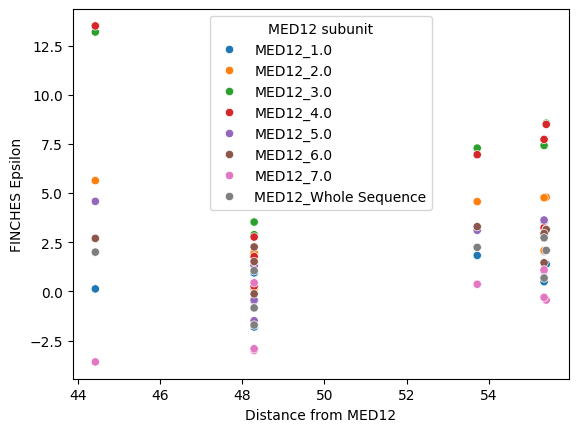

In [41]:
sns.scatterplot(MED12_finches_pivot_melted[MED12_finches_pivot_melted["Classification"] == "AD"], x = "Distance from MED12", y = "FINCHES Epsilon", hue = "MED12 subunit")

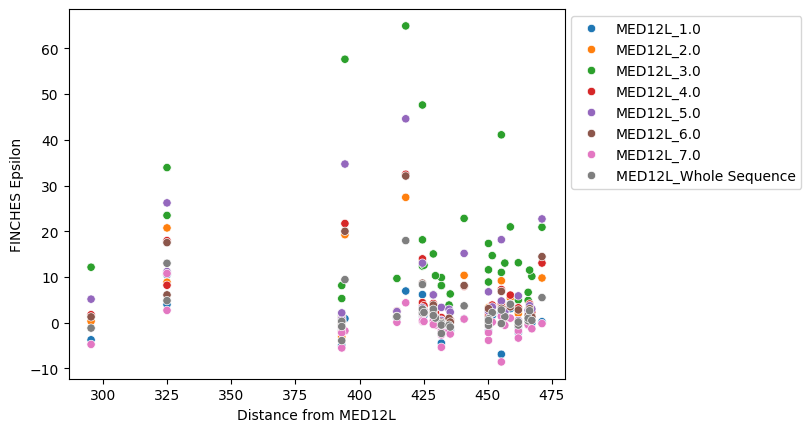

In [46]:
sns.scatterplot(MED12L_finches_pivot_melted[MED12L_finches_pivot_melted["Classification"] == "AD"], x = "Distance from MED12L", y = "FINCHES Epsilon", hue = "MED12L subunit")
plt.legend(bbox_to_anchor=(1,1))